# 1. Imports and Dataset Overview

Before diving into visualizations, let’s load some essential libraries and fetch a dataset using `scikit-learn`.

We’ll be using the **Breast Cancer Wisconsin dataset**, which is available via `sklearn.datasets`. We’ll convert it into a `pandas.DataFrame` to simplify data manipulation and exploration.

This dataset includes measurements of cell nuclei present in breast cancer biopsies and a target label indicating whether the tumor is **malignant** or **benign**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer(as_frame=True)
df = breast_cancer['frame']  # this is the DataFrame
print(breast_cancer.keys())
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


# 2. Inspecting the Dataset

From the output above, we see that the `breast_cancer` object contains several components. One of them is the `frame` key, which holds the actual data as a `pandas.DataFrame`.

**Tip:** Always begin your analysis by exploring the dataset:
- Check the structure, shape, and column names.
- Identify the **target column**, which we want to predict. Here, it's called `target`, with values `0 = malignant` and `1 = benign`.

You can also print `breast_cancer.DESCR` to get a detailed description of:
- What each feature represents
- How the data was collected
- The dataset's source and intended use

When working with plain `.txt` or `.csv` files, it's good practice to **open the file and inspect it manually**. This helps determine:
- Where the actual data starts
- Which lines are comments or headers
- How the data is separated (e.g., commas, tabs, semicolons)

## 2.1 Identifiying Features to Use for Training

Not all features in a dataset are useful for training a machine learning model.

Here’s how we can:
- Identify the input features (`X`) and the target (`y`)
- Optionally remove features that are not informative or redundant

Common reasons to drop features:
- They leak information about the target
- They’re IDs or metadata (like timestamps, patient IDs)
- They’re highly correlated with others (multicollinearity)

## 2.2. Inspecting Data with Panda build in functions

Separating the **features** from the **target** is a common and important step when preparing data for machine learning. It makes it easier to:

- Train and test models effectively
- Drop redundant or uninformative features
- Work with preprocessing pipelines

Which is why there is a cell below that shows how to do exactly that. 
However, for **exploratory data analysis**, it’s useful to continue working with the original DataFrame `df`, since it includes both the features and the target column. This allows us to:

- Directly group or filter by the target label
- Visualize how features relate to the target
- Simplify correlation analysis between features and labels

Data Preperation is covered in more detail in the `PreparingData.ipynb`.

In [15]:
# Separate target and features
target = 'target'
X = df.drop(columns=[target])  # features
y = df[target]                 # label

# Optionally drop known uninformative or redundant features
# For this dataset, everything is numeric and valid, but this is where you'd do it
# Example: X = X.drop(columns=['some_id_column', 'redundant_feature'])

# Show shape and head
print("Shape of feature matrix X:", X.shape)
print("Target classes:", y.unique())
X.head()

Shape of feature matrix X: (569, 30)
Target classes: [0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2.2.2 Histograms

To get a quick overview of how feature values are distributed, we can use `DataFrame.hist()`. This internally calls `matplotlib.pyplot.hist()` for each selected feature.

Here, we’re plotting the first 4 features from the dataset.

We adjust the transparency (`alpha`) and figure size for better readability.


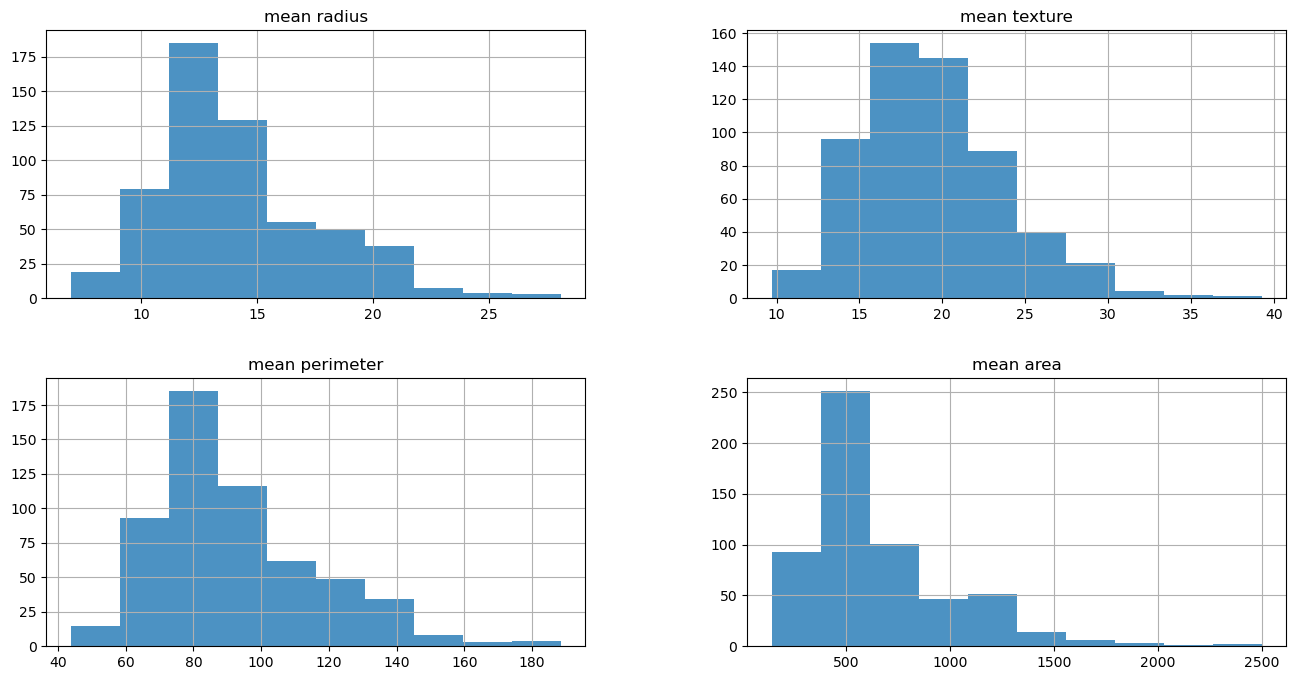

In [16]:
X[breast_cancer.feature_names[0:4]].hist(alpha=0.8, figsize=(16, 8))
plt.show()

### 2.2.3 Kernel Density Estimation (KDE)

Histograms are great, but they can be a bit "blocky". A smoother alternative is **Kernel Density Estimation (KDE)**.

Here, we group the data by target (malignant/benign) and use the KDE plot to compare the distribution of the `mean radius` feature.

For an excellent interactive explanation of KDEs, check out [this blog post](https://mathisonian.github.io/kde/).

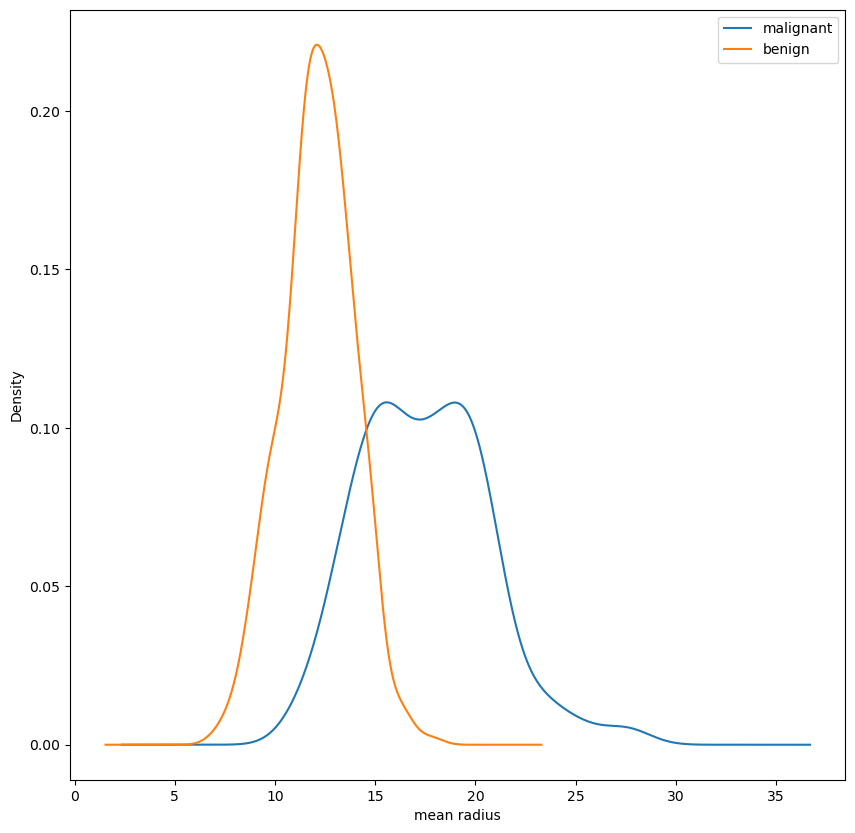

In [19]:
df.groupby("target")["mean radius"].plot(kind='kde', figsize=(10, 10))
plt.legend(['malignant', 'benign'], loc='upper right')
plt.xlabel('mean radius')
None

## 2.2.4 Scatter Matrix for Feature Relationships

Scatter matrices (also known as pair plots) are useful to see how features relate to each other.

We use `pandas.plotting.scatter_matrix()` to visualize the relationships among the first 10 features.

Each point is colored by the target label. This can give insights into separability and correlation between features.

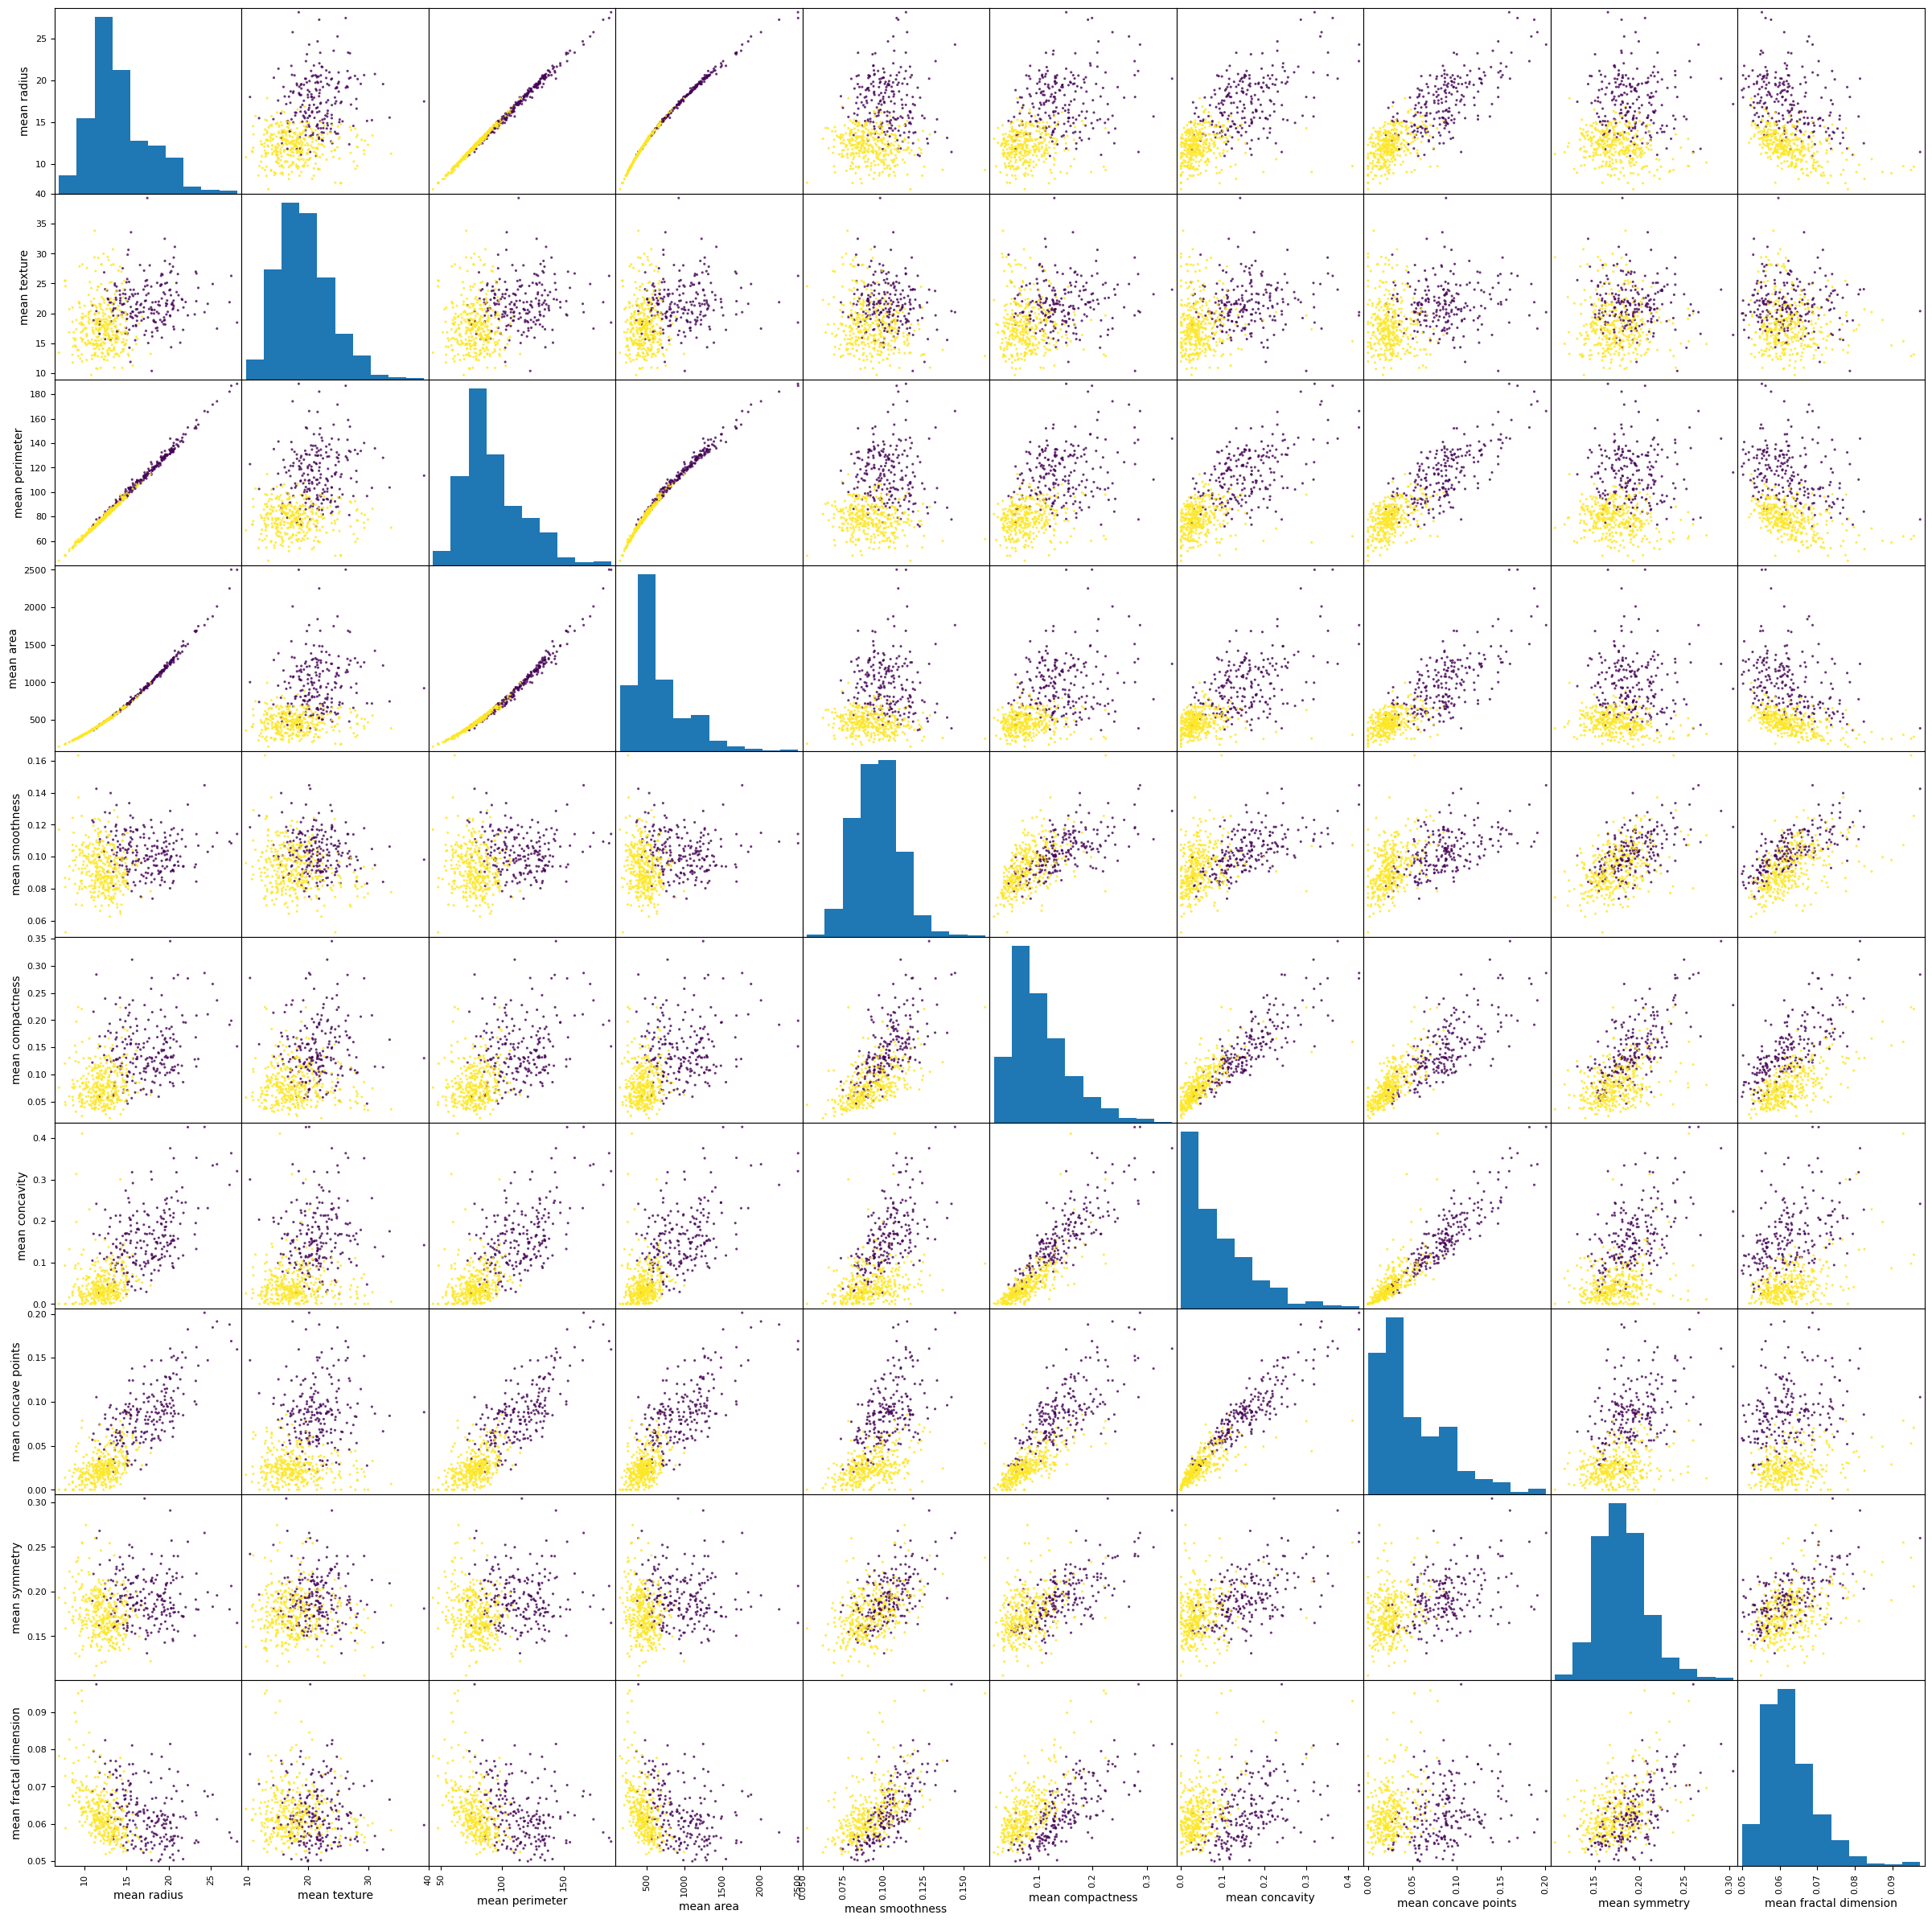

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[breast_cancer.feature_names[0:10]], c=breast_cancer.target, alpha=0.8, figsize=(30, 30), s=20)
plt.show()

## 2.3. Inspecting Data with Seaborn

### 2.3.1 Heatmap of Correlations

Another powerful way to analyze feature relationships is by visualizing their correlation matrix.

We use **Seaborn’s heatmap** for this. High correlation values indicate strong linear relationships between features.

This can help you detect redundancy or multicollinearity in your dataset.

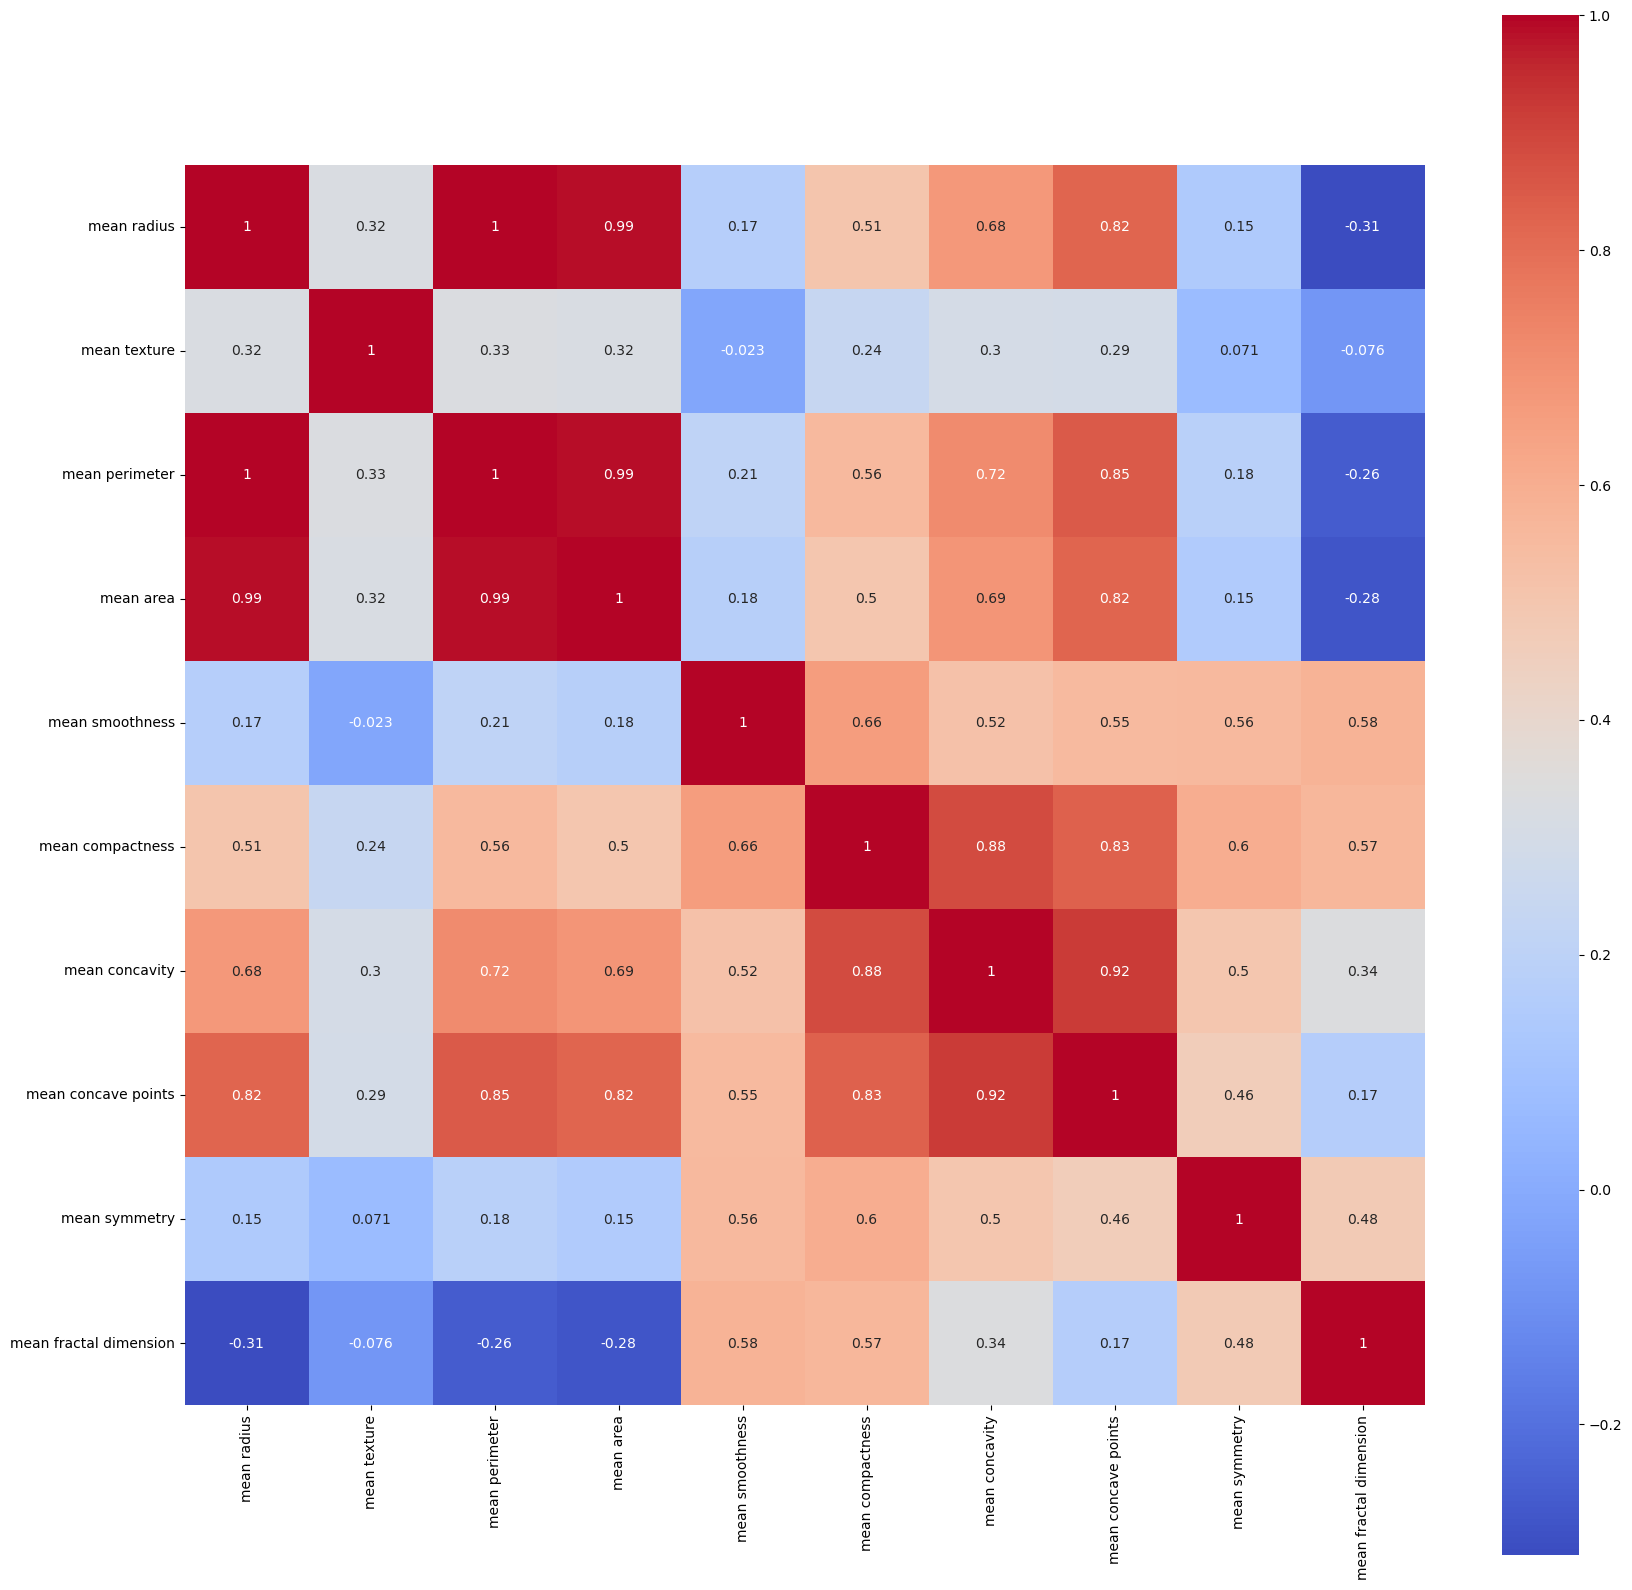

In [14]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df[breast_cancer.feature_names[0:10]].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()